# Numerical Analysis 

## Exercise 1

In the initial range of  $[0.5,1] $ , we have the following function of $ f(x)= 2x+ 3sin(4x) - e^x$ , in part (i) by hand with an accuracy of two decimals.

In part (ii), a scipt in python has been assembeled in order to calculate the root of the function in 3, 6 and 12 decimals in accuracy.

In [6]:
# Numerical Analysis Course - Physics Department Auth 
# Michael Chadolias  AEM: 14871
#
# Set 1st 
# Exercise 1b

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
def func(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)
#define the function

In [8]:
diff= [10**(-3),10**(-6),10**(-12)] #accuracy 
iteration= [1]
a ,b ,index= 0.5, 1.0 , 1 #initial conditions 
distance= [a,b] #range 
fun=[] #function
sol=[] 
mesos= np.average(distance)
notification=[0,0]

In [9]:
while True:
    if (func(distance[0])*func(mesos))<0:
        distance[-1]= mesos
        fun.append(func(mesos))
        sol.append(mesos)
       # print('%.d %.16f'% (iteration[-1], func(mesos)))
        mesos= np.average(distance)
    else:
        distance[0]= mesos
        fun.append(func(mesos))
        sol.append(mesos)
      #  print('%.d %.16f'% (iteration[-1], func(mesos)))
        mesos= np.average(distance)
    if iteration[-1]>2:
        if (np.abs(fun[-1]-fun[-2])<diff[-1]):
            break   
        elif  (np.abs(fun[-1]-fun[-2])<diff[-2]): 
            if notification[0]==0:
                print("For error",diff[-2],"the iteration must reach:",'%.d %.16f'%(iteration[-1], sol[-1]))
                notification[0]=1
        elif  (np.abs(fun[-1]-fun[-2])<diff[-3]):
            if notification[1]==0:
                print("For error", diff[-3] ,"the iteration must reach:",'%.d %.16f'%(iteration[-1], sol[-1]))
                notification[1]=1
    iteration.append(index)
    index= index+1    
print("For error",diff[-1],"the iteration must reach:",'%.d %.16f'%(iteration[-1], sol[-1]))

For error 0.001 the iteration must reach: 12 0.7337036132812500
For error 1e-06 the iteration must reach: 22 0.7337501645088196
For error 1e-12 the iteration must reach: 42 0.7337501563750379


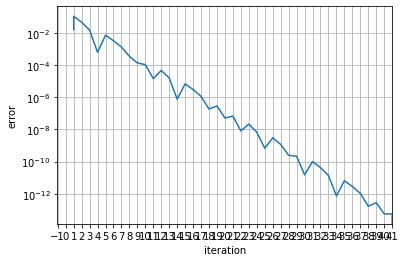

In [10]:
N = len(sol)
error = sol[N-1]-sol
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.xlim(right=N-2)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

As part of the (iii), the initial function of $ f(x) $, is solved in the same levels of accuracy with the Linear Interpolation and Newton-Raphson

The first method that is being calculated with the Linear Interpolation,

In [11]:
def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)

In [12]:
#initial condition
x= [0.5,1.0]
iteration=[]
sol=[]

In [13]:
for i in range(0,10):
   x.append( x[i+1]- f1(x[i+1])/(f1(x[i+1])-f1(x[i]))*(x[i+1]-x[i]))
   iteration.append(i)
   sol.append(x[i+2])
   if x[-2]==x[-1]:
       break

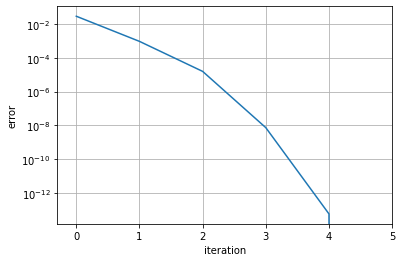

In [14]:
N = len(sol)
error = sol[N-1]-sol
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.xlim(right=N-2)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

The second method that is being calculated with Newton-Raphson,

In [15]:
def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)

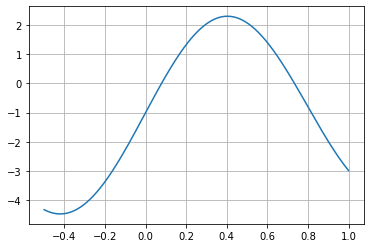

In [16]:
xpoints = np.linspace(-0.5,1,500)
fpoints = f1(xpoints)

plot1 = plt.plot(xpoints, fpoints)
plt.grid(True)
plt.show(plot1)

In [17]:
iteration = [0]
i=1
x=0.5
solution = [x]
print('%.d %.16f'% (iteration[0], solution[0]))
while True:
   x = x- f1(x)/(2+12*np.cos(4*x)-np.exp(x))
   iteration.append(i)
   solution.append(x)
   print('%.d %.16f'% (iteration[i], solution[i]))
   if solution[-1]==solution[-2]:
       break
   i=i+1

0 0.5000000000000000
1 0.9478575088524588
2 0.7012083864794754
3 0.7344929947971298
4 0.7337504322873647
5 0.7337501563750328
6 0.7337501563749944
7 0.7337501563749944


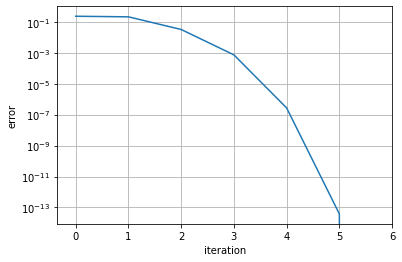

In [18]:
N = len(solution)
error = solution[N-1]-solution
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.xlim(right=N-2)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()